# Classifica√ß√£o - Satisfa√ß√£o de Passageiro em Linhas A√©reas

## Autores
- Felipe Bakowski Nantes de Souza  
- Vinicius Grecco Fonseca Mulato  
- Victor Soares


# 1.    Data set - Sele√ß√£o

### FAZER

# 2. Data set - Explica√ß√£o

Esse data set possui 25 colunas, 24 sendo potenciais features e 1 target (satisfa√ß√£o). Ela √© uma vari√°vel categ√≥rica n√£o ordenada e assume 2 valores: satisfeito ou neutro/insatisfeito. Ainda, a target est√° bem balanceada, estando divida em 43/57 %

Em rela√ß√£o as features, elas variam entre qualitativas e quantitativas, sendo majoritariamente qualitativas e com poucas linhas com valores faltando.

### Colunas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlp import mlp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from utils import plot_distributions

# carregar os dois conjuntos
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")

# marcar a origem para poder separar depois
df_train["_source"] = "train"
df_test["_source"]  = "test"

# concatenar
df = pd.concat([df_train, df_test], ignore_index=True)

print("Shape combinado:", df.shape)
print(df["_source"].value_counts())

target = df['satisfaction']

df.columns

Shape combinado: (129880, 26)
_source
train    103904
test      25976
Name: count, dtype: int64


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', '_source'],
      dtype='object')

### Target bem equilibrada

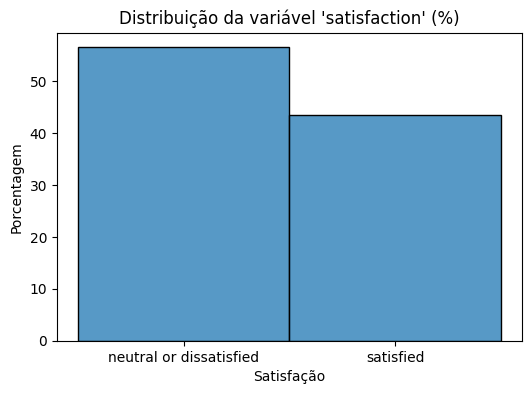

In [2]:
plt.figure(figsize=(6,4))
ax = sns.histplot(x=target, stat="percent", discrete=True)

plt.title("Distribui√ß√£o da vari√°vel 'satisfaction' (%)")
plt.xlabel("Satisfa√ß√£o")
plt.ylabel("Porcentagem")
plt.show()

### Preenchendo valores vazios

In [3]:
print(df.columns[df.isnull().any()]) #observa-se colunas com valores faltando!

Index(['Arrival Delay in Minutes'], dtype='object')


### Arrival delay √© num√©rica, utilizaremos a moda para preencher o valor, j√° que se arrival delay est√° como null, provavelmente foi 0 e esqueceram de colocar

In [4]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0])
print(df.columns[df.isnull().any()]) #roda mais uma vez para garantir

Index([], dtype='object')


### Visualiza√ß√£o features

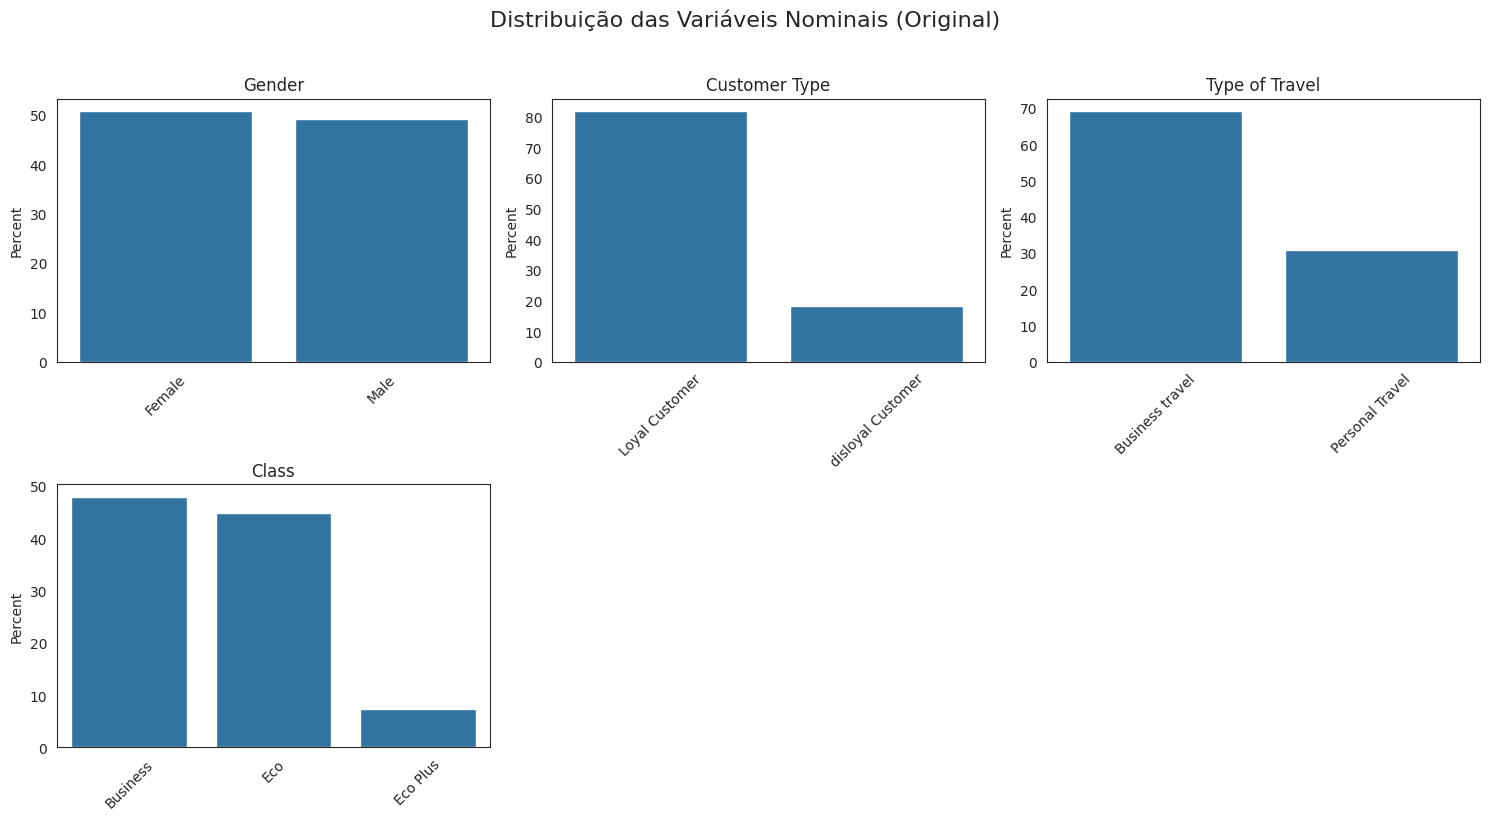

In [5]:
# definir colunas
quantitative_cols = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

ordinal_cols = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
]

nominal_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
target_col = "satisfaction"

# -------- PLOT ORIGINAL --------
plot_distributions(df, quantitative_cols, ordinal_cols, nominal_cols, title_suffix="(Original)", force_ordinal_continuous=False)


Pelas distribui√ß√µes apresentadas, as vari√°veis categ√≥ricas est√£o relativamente balanceadas em alguns aspectos, mas apresentam diferen√ßas relevantes em outros. O g√™nero est√° equilibrado entre homens e mulheres. J√° o tipo de cliente √© bastante desbalanceado, com predomin√¢ncia de clientes leais. No tipo de viagem, h√° mais viagens de neg√≥cios do que pessoais. Em rela√ß√£o √† classe, as categorias Business e Eco t√™m propor√ß√µes pr√≥ximas, enquanto Eco Plus aparece em bem menor quantidade. A vari√°vel de satisfa√ß√£o tamb√©m √© relativamente balanceada, com uma leve maioria de clientes insatisfeitos ou neutros.

Nas vari√°veis num√©ricas, observa-se diversidade: a idade segue uma distribui√ß√£o concentrada entre 20 e 50 anos; a dist√¢ncia do voo √© enviesada para valores menores; e os atrasos de partida e chegada apresentam forte concentra√ß√£o em atrasos curtos, com alguns outliers de longos atrasos. J√° os servi√ßos avaliativos (como wifi, comida, embarque, conforto de assento, limpeza, etc.) mostram distribui√ß√µes variadas, mas tendem a concentrar respostas em notas intermedi√°rias a altas, o que sugere certo vi√©s positivo nas avalia√ß√µes.

# 3. Limpeza de dados e normaliza√ß√£o

Claro! Aqui vai uma explica√ß√£o simples e direta sobre **por que normalizamos cada grupo de vari√°veis do jeito que fizemos**:

---

### üîπ Z-Score (m√©dia 0, desvio 1)

Usamos em **Age** e nas vari√°veis **ordinais (avalia√ß√µes de 1 a 5)**.

* **Por qu√™?**

  * O Z-score centraliza os dados na m√©dia e escala pela variabilidade.
  * Isso coloca todas essas vari√°veis em uma escala compar√°vel (valores entre -2 e 2, geralmente).
  * √â √∫til quando os dados s√£o aproximadamente sim√©tricos ou queremos destacar desvios em rela√ß√£o √† m√©dia.

Exemplo: Idades diferentes s√£o comparadas em termos de "quantos desvios padr√£o acima ou abaixo da m√©dia" est√£o.

---

### üîπ Min-Max [-1, 1]

Usamos em **Flight Distance** e nos **delays (ap√≥s log)**.

* **Por qu√™?**

  * O Min-Max traz os valores para um intervalo fixo, aqui entre -1 e 1.
  * Isso garante que nenhuma vari√°vel tenha escala muito maior que as outras.
  * √â √∫til quando a distribui√ß√£o n√£o √© centrada na m√©dia, mas queremos que o modelo ‚Äúveja‚Äù tudo na mesma faixa.

---

### üîπ Log + Min-Max

Usamos em **Departure Delay** e **Arrival Delay**.

* **Por qu√™?**

  * Atrasos t√™m distribui√ß√£o muito enviesada: muitos voos com atraso 0 ou baixo, e poucos voos com atrasos enormes.
  * O log ‚Äúcomprime‚Äù esses valores grandes, reduzindo o impacto dos extremos.
  * Depois, aplicamos Min-Max para trazer o resultado para a faixa [-1,1], alinhando com as outras features.

---

### üîπ One-Hot Encoding (nominais)

Nas vari√°veis como **Gender, Customer Type, Type of Travel, Class**.

* **Por qu√™?**

  * S√£o categorias sem ordem (ex.: ‚ÄúMale‚Äù ‚â† maior que ‚ÄúFemale‚Äù).
  * O One-Hot cria colunas bin√°rias (`0` ou `1`) para cada categoria, sem necessidade de normaliza√ß√£o extra.

---

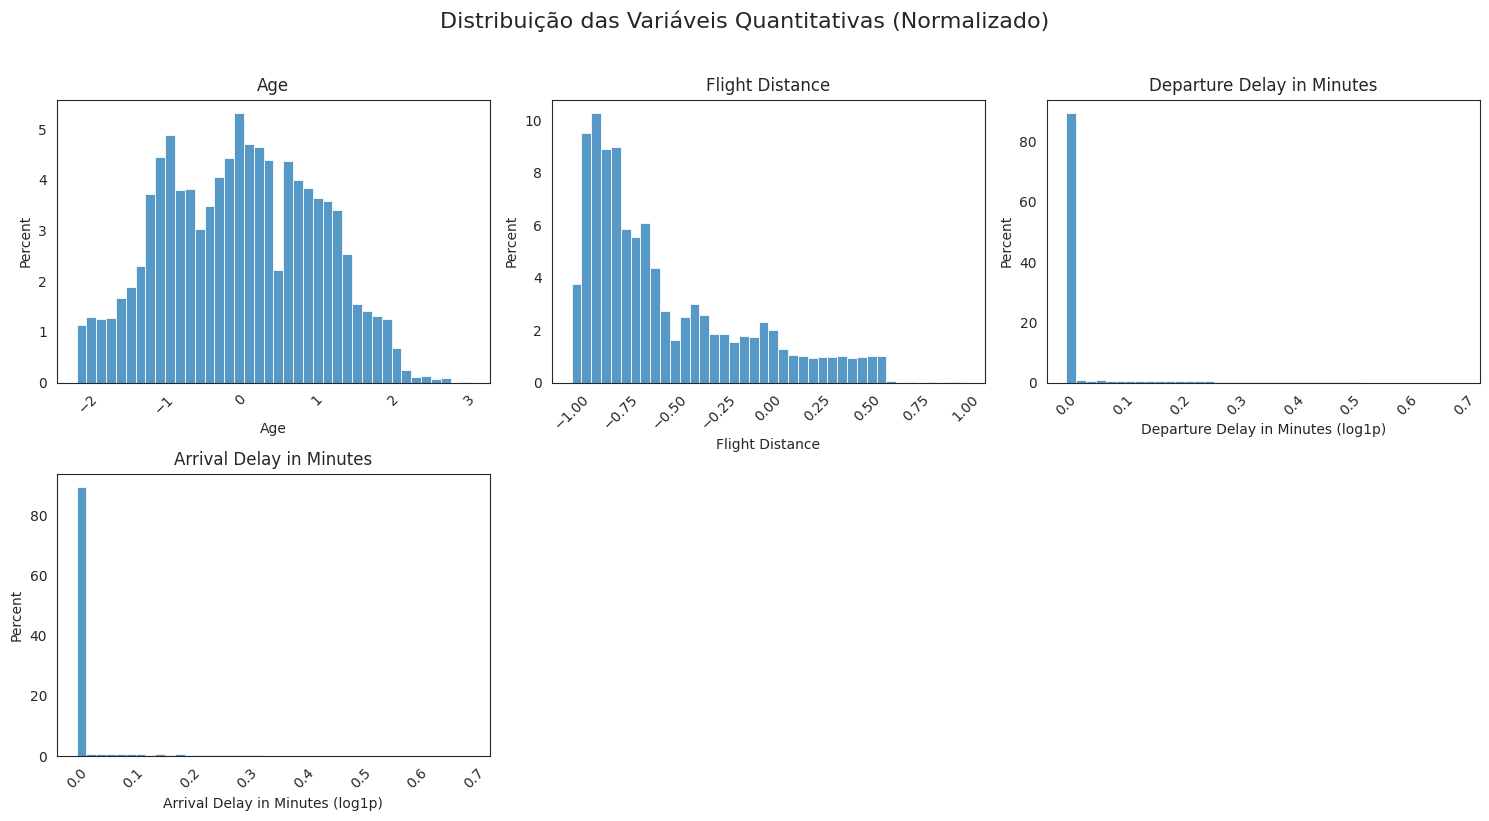

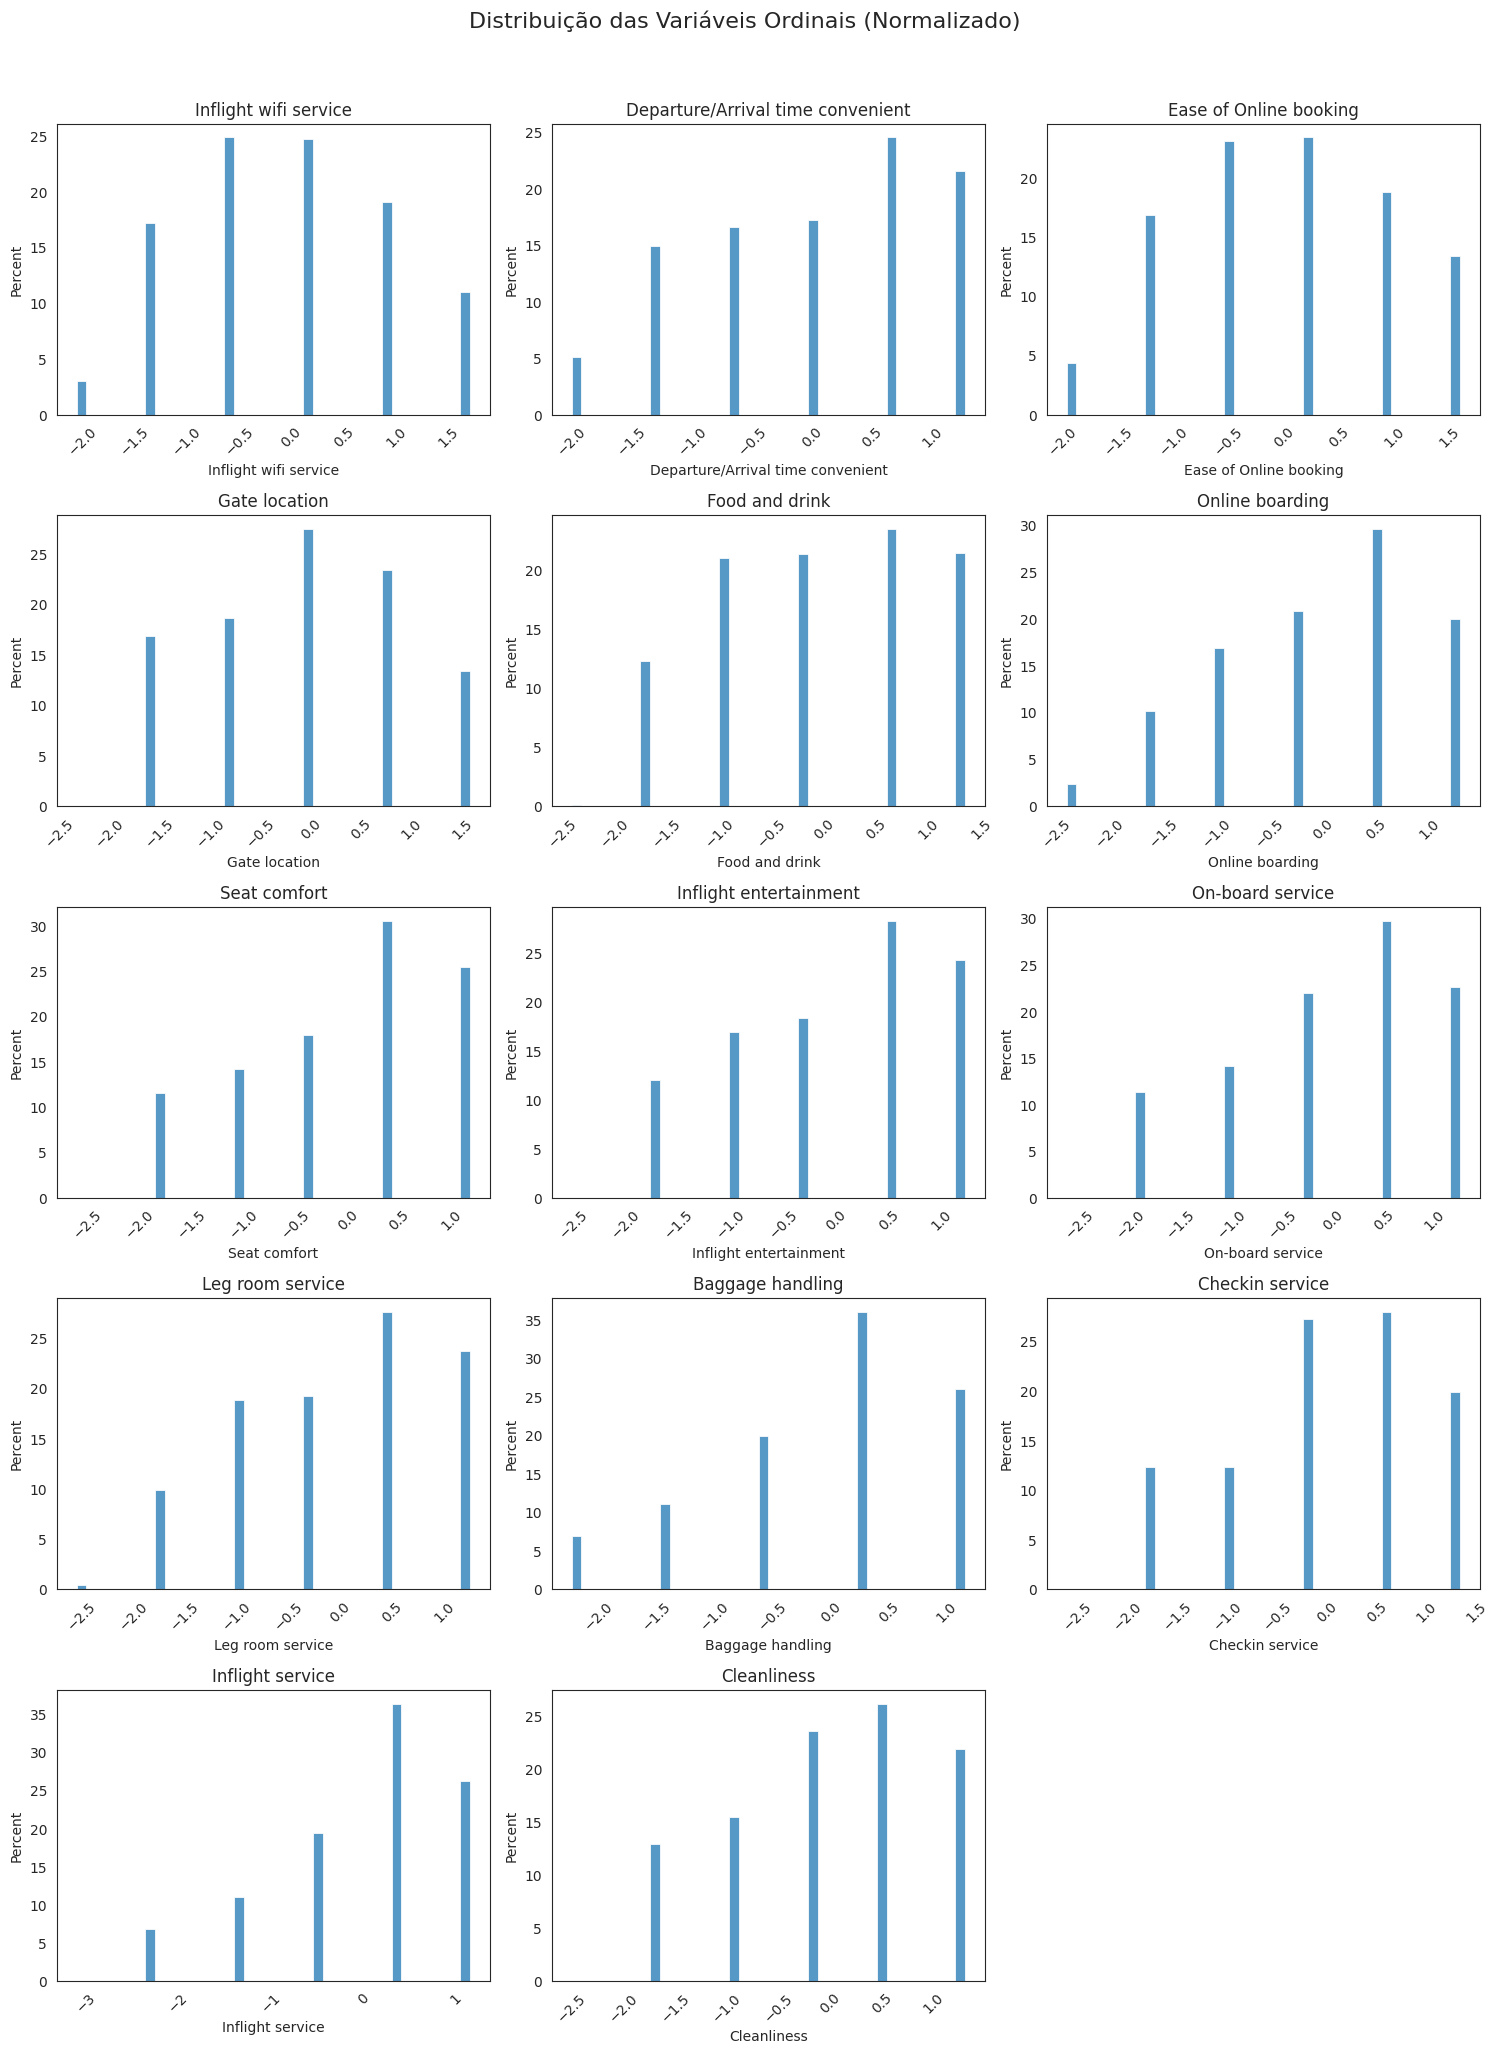

In [6]:
# -------- ONE-HOT + TARGET --------
df_encoded = pd.get_dummies(df, columns=nominal_cols, dtype=int)
df_encoded[target_col] = df_encoded[target_col].map({
    "satisfied": 1,
    "neutral or dissatisfied": 0
})

# -------- NORMALIZA√á√ÉO --------
df_norm = df_encoded.copy()

# Age + ordinais -> Z-score
scaler_z = StandardScaler()
df_norm[["Age"] + ordinal_cols] = scaler_z.fit_transform(df_norm[["Age"] + ordinal_cols])

# Flight Distance -> MinMax [-1,1]
scaler_fd = MinMaxScaler(feature_range=(-1,1))
df_norm["Flight Distance"] = scaler_fd.fit_transform(df_norm[["Flight Distance"]])

# Delays -> log + MinMax [-1,1]
for col in ["Departure Delay in Minutes", "Arrival Delay in Minutes"]:
    df_norm[col] = np.log1p(df_norm[col].clip(lower=0))
    scaler_delay = MinMaxScaler(feature_range=(-1,1))
    df_norm[col] = scaler_delay.fit_transform(df_norm[[col]])

df_norm.head()
# -------- PLOT NORMALIZADO --------
plot_distributions(
    df_norm,
    quantitative_cols,
    ordinal_cols,
    [],  # <- passa lista vazia, n√£o plota nominais
    title_suffix="(Normalizado)",
    force_ordinal_continuous=True
)


# 4. Implementa√ß√£o MLP

### EXPLICAR

# 5. Treinando Modelo

### EXPLICAR

# 6. Estrat√©gia de treino e teste

In [10]:
drop_cols = ["Unnamed: 0", "id", "satisfaction"]

df_train = df_norm[df_norm["_source"] == "train"].drop(columns=["_source"], errors="ignore")
df_test  = df_norm[df_norm["_source"] == "test"].drop(columns=["_source"], errors="ignore")

X_train = df_train.drop(columns=drop_cols, errors="ignore").apply(pd.to_numeric, errors="coerce").fillna(0).values.astype(float)
y_train = df_train["satisfaction"].astype(int).values

X_test = df_test.drop(columns=drop_cols, errors="ignore").apply(pd.to_numeric, errors="coerce").fillna(0).values.astype(float)
y_test = df_test["satisfaction"].astype(int).values if "satisfaction" in df_test.columns else None

model = mlp(
    n_features=X_train.shape[1],
    n_hidden_layers=2,
    n_neurons_per_layer=[32, 16, 2],
    activation="relu",
    loss="cross_entropy",
    optimizer="gd",
    epochs=100,
    eta=0.01
)

model.train(X_train, y_train)



=== Inicializa√ß√£o de Pesos e Biases ===
Camada 1:
W1 shape (32, 27):
[[ 1.15933603e-01 -1.81859311e-02  3.78720797e-02  1.61887445e-01
  -1.76264976e-02 -1.17896559e-01  2.29659597e-01  8.47392716e-02
   7.84833501e-02  1.17116376e-01 -3.29254012e-02  1.47752258e-01
  -5.05408257e-02 -1.03760407e-02 -6.75068207e-02  7.65876531e-02
   2.24685014e-01 -4.85771329e-02  9.20202828e-02 -1.39268909e-01
  -1.33149834e-01  7.09939469e-02  9.62322284e-03  1.97430345e-01
   7.96567200e-02 -2.02657840e-01  9.01385734e-03]
 [-6.04410809e-02  1.55657322e-02 -6.76827315e-02  8.16054968e-02
   9.60520887e-03 -1.25204605e-01 -6.19064575e-02 -6.01804224e-02
   5.45090162e-02  2.06770711e-01  8.75548772e-02  7.76242877e-02
   9.78846571e-03 -3.32076578e-02 -2.81371297e-02 -1.04293824e-01
  -2.11831322e-01  9.67483947e-02  1.19716602e-02  4.71019153e-02
   8.49512245e-03 -9.58052260e-02  1.06920949e-01  1.34581558e-01
   1.10775335e-01 -1.21445693e-02 -8.24293321e-03]
 [-1.07644203e-01  1.19474816e-01 

In [11]:
preds_test = model.test(X_test)

# 7. Curva de erro e visualiza√ß√£o

Accuracy: 96.01%

=== Pesos e Biases do Modelo ===

Camada 1:
  Pesos W1 (shape (32, 27)):
[[-5.90536709e-01  4.66615554e-01 -4.49108095e-01  5.21877533e-03
   3.25350763e-01  7.17445084e-02 -1.22360259e-02  1.18032302e+00
   3.48788226e+00 -1.01996644e-02  4.23905953e-01  2.89380884e-02
  -1.68034617e+00 -1.03658232e-01  4.08442980e-01  7.29463962e-01
   8.41765767e-02  1.99656636e-01 -3.52814596e-01 -6.00852790e-01
   3.88832152e-01 -1.35740680e+00 -2.79580057e-01 -4.19785134e-01
   2.84328537e-01 -9.54605775e-01 -3.50128783e-01]
 [ 2.11480807e-01  1.00159878e-01 -3.06430613e-01  1.81622933e-01
  -1.74595611e-01  7.60054834e-01 -1.08294362e-01 -6.50388801e-01
  -1.00690675e+00  1.99061008e+00  3.52784516e-01  6.80065608e-01
   2.42878895e-01 -4.88982385e-02  4.75156172e-01  1.12191729e-01
  -4.96634271e-01  2.57593430e-01 -3.83644338e-01 -2.87492645e-01
   5.30848775e-02 -8.70605540e-01 -3.47258423e-01 -1.41449629e-01
   8.23021086e-01 -1.08758530e+00 -3.75258515e-01]
 [-2.07872079e+

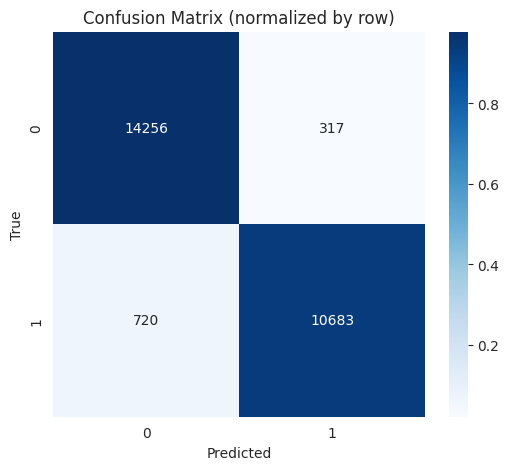

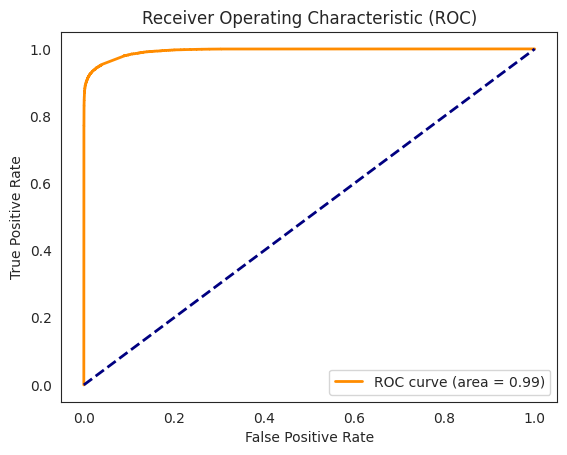

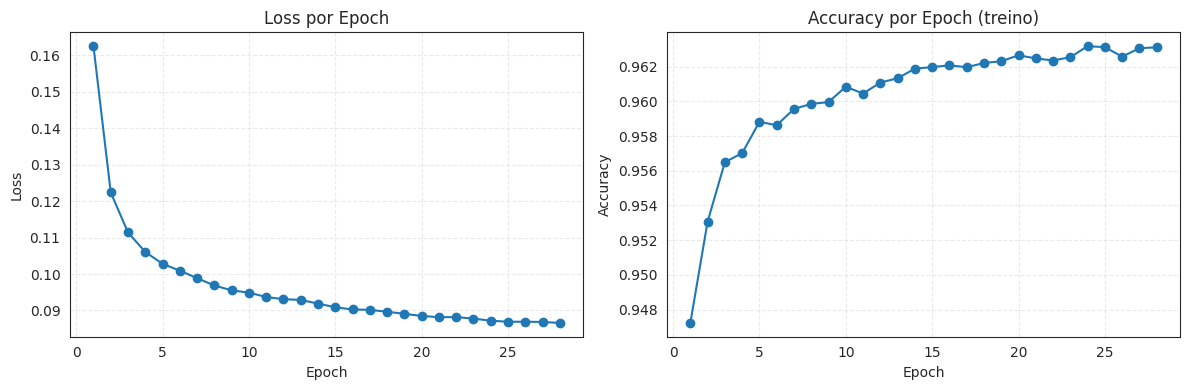

In [12]:
model.evaluate(X_test, y_test, plot_confusion=True, plot_roc=True, preds=preds_test)

# 8. Avalia√ß√£o do modelo

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
preds = logreg.predict(X_test)

print("Accuracy (LogReg):", accuracy_score(y_test, preds))
print("AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))


Accuracy (LogReg): 0.8717277486910995
AUC: 0.9269720121120558


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

print("Accuracy (RandomForest):", accuracy_score(y_test, preds))


Accuracy (RandomForest): 0.963658761934093


In [15]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print("Accuracy (Dummy):", dummy.score(X_test, y_test))


Accuracy (Dummy): 0.5610178626424391
